# Univariate Resemblance Analysis (URA) Dataset F

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from univariate_resemblance import basic_stats
from univariate_resemblance import student_t_tests
from univariate_resemblance import mann_whitney_tests
from univariate_resemblance import ks_tests
from univariate_resemblance import chi_squared_tests
from univariate_resemblance import scale_data
from univariate_resemblance import euclidean_distances
from univariate_resemblance import cosine_distances
from univariate_resemblance import js_distances
from univariate_resemblance import wass_distances

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/F_IndianLiverPatient_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/F_IndianLiverPatient_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/F_IndianLiverPatient_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/F_IndianLiverPatient_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/F_IndianLiverPatient_Synthetic_WGANGP.csv'}
categorical_columns = ['gender','class']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':      age  gender   TB   DB  alkphos  sgpt   sgot   TP  ALB   A_G class
 0     68  Female  0.6  0.1   1620.0  95.0  127.0  4.6  2.1  0.80   1.0
 1     31    Male  1.3  0.5    184.0  29.0   32.0  6.8  3.4  1.00   1.0
 2     28    Male  0.8  0.3    190.0  20.0   14.0  4.1  2.4  1.40   1.0
 3     60    Male  2.3  0.6    272.0  79.0   51.0  6.6  3.5  1.10   1.0
 4     48  Female  0.9  0.2    173.0  26.0   27.0  6.2  3.1  1.00   1.0
 ..   ...     ...  ...  ...      ...   ...    ...  ...  ...   ...   ...
 461   75  Female  0.8  0.2    188.0  20.0   29.0  4.4  1.8  0.60   1.0
 462   36    Male  5.3  2.3    145.0  32.0   92.0  5.1  2.6  1.00   2.0
 463   37    Male  0.7  0.2    235.0  96.0   54.0  9.5  4.9  1.00   1.0
 464   17  Female  0.5  0.1    206.0  28.0   21.0  7.1  4.5  1.70   2.0
 465   17    Male  0.9  0.2    224.0  36.0   45.0  6.9  4.2  1.55   1.0
 
 [466 rows x 11 columns],
 'GM':      age  gender        TB        DB     alkphos        sgpt        sgot  \
 0     68    Male

## 2. Basic statistics comparisson
In this part the basic statistics of each attribute for each dataset are computed.
- means and stds of all variables are compared.

In [5]:
df_means_std = pd.DataFrame(index=data['Real'].select_dtypes(include=['float64','int64']).columns.tolist())
for name in DATA_TYPES :
    means_stds = basic_stats(data[name])
    means_stds.columns = [name]
    df_means_std = pd.concat([df_means_std,means_stds], axis=1)
df_means_std

,Real,GM,SDV,CTGAN,WGANGP
age,44.21 ± 15.65,43.91 ± 16.27,43.75 ± 15.71,56.29 ± 17.08,35.14 ± 5.41
TB,NaN,NaN,NaN,NaN,NaN
DB,NaN,NaN,NaN,NaN,NaN
alkphos,NaN,NaN,NaN,NaN,NaN
sgpt,NaN,NaN,NaN,NaN,NaN
sgot,NaN,NaN,NaN,NaN,NaN
TP,NaN,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN
A_G,NaN,NaN,NaN,NaN,NaN


## 3. Statistical Tests
In this part some statistical tests are performed to compare variables from real and synthetic data.

### 3.1. Sudent t-test
- null hypothesis (p > 0.05): Means of real and synthetic feature are the same.
- alternative hypothesis (p < 0.05): Mean of real and synthetic feature are significantly different.

In [6]:
p_values_student = dict()
for name in SYNTHESIZERS :
    p_values_student[name] = student_t_tests(data['Real'], data[name])
df_student_test = pd.DataFrame(data=p_values_student, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_student_test.to_csv('UNIVARIATE RESEMBLANCE RESULTS/student_t_tests.csv')
df_student_test

,GM,SDV,CTGAN,WGANGP
age,7.7555e-01,6.5193e-01,1.2520e-27,3.6089e-30
TB,2.4868e-01,5.3764e-12,2.7186e-01,2.8885e-05
DB,5.7127e-01,3.1825e-11,7.9219e-03,5.1471e-09
alkphos,3.3892e-05,2.3050e-02,2.1668e-01,4.6956e-05
sgpt,6.7838e-04,1.6894e-15,1.8290e-02,7.3947e-01
sgot,3.3274e-02,1.9787e-18,6.5421e-03,1.2020e-04
TP,5.8427e-01,3.9638e-01,5.6485e-10,5.3960e-80
ALB,5.5841e-01,7.7042e-01,5.5020e-06,1.2533e-113
A_G,1.5717e-01,3.0200e-46,9.8127e-03,4.1141e-01


### 3.2. Mann-Whitney U-Test
- null hypothesis (p > 0.05): Real feature and synthetic feature come from the same population.
- alternative hypothesis (p < 0.05): Real feature and synthetic feature does not come from the same population.

In [7]:
p_values_mann_whitnney = dict()
for name in SYNTHESIZERS :
    p_values_mann_whitnney[name] = mann_whitney_tests(data['Real'], data[name])
df_mann_whitney = pd.DataFrame(data=p_values_mann_whitnney, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_mann_whitney.to_csv('UNIVARIATE RESEMBLANCE RESULTS/mann_whitnney_tests.csv')
df_mann_whitney

,GM,SDV,CTGAN,WGANGP
age,3.7085e-01,3.1404e-01,8.8070e-28,6.0408e-24
TB,2.6034e-08,2.8436e-42,1.4131e-08,8.6219e-20
DB,6.5142e-02,3.8233e-44,4.8378e-01,2.2643e-04
alkphos,2.1364e-03,6.0486e-05,4.1678e-01,4.1162e-03
sgpt,1.5412e-02,1.9076e-49,1.3025e-04,5.8444e-54
sgot,9.2497e-03,3.5007e-65,8.5662e-23,5.2942e-08
TP,2.7011e-01,4.0137e-01,1.1284e-09,9.6861e-72
ALB,2.4011e-01,4.7820e-01,4.8116e-06,5.9207e-92
A_G,1.8342e-01,2.2780e-154,2.2780e-154,1.5747e-113


### 3.3. Kolmogorov-Smirnov Test
- null hypothesis (p > 0.05): Real feature and synthetic feature distributions are equal.
- alternative hypothesis (p < 0.05): Real feature and synthetic feature distributions are not equal.

In [8]:
p_values_ks = dict()
for name in SYNTHESIZERS :
    p_values_ks[name] = ks_tests(data['Real'], data[name])
df_ks = pd.DataFrame(data=p_values_ks, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_ks.to_csv('UNIVARIATE RESEMBLANCE RESULTS/ks_tests.csv')
df_ks

,GM,SDV,CTGAN,WGANGP
age,9.4678e-01,3.6978e-01,9.4980e-25,8.6677e-54
TB,2.6302e-13,6.8236e-52,1.6900e-19,5.4021e-43
DB,1.0200e-06,3.9569e-45,3.9330e-04,3.9300e-24
alkphos,1.8568e-03,7.1817e-17,8.7149e-04,2.6302e-13
sgpt,6.4513e-02,1.0530e-58,7.1343e-07,3.9886e-84
sgot,1.7420e-02,5.3711e-71,3.9300e-24,5.7759e-29
TP,5.6734e-01,6.7723e-01,4.3812e-13,1.0124e-115
ALB,2.2202e-01,5.6734e-01,5.2727e-05,2.2350e-125
A_G,9.3142e-03,2.1084e-279,2.1084e-279,9.0895e-216


### 3.4. Join all p-values of all tests in one unique dataset

In [9]:
tests_all_data = np.round(np.concatenate([df_student_test.values, df_mann_whitney.values, df_ks.values] , axis=1),4)
#join results of all tests
df_tests_all = pd.DataFrame(data=tests_all_data, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns,
                columns=['GM_S','SDV_S','CTGAN_S','WGANGP_S','GM_M','SDV_M','CTGAN_M','WGANGP_M','GM_K','SDV_K','CTGAN_K','WGANGP_K'])
df_tests_all.to_csv('UNIVARIATE RESEMBLANCE RESULTS/STATISTICAL_TESTS_ALL.csv')
df_tests_all

,GM_S,SDV_S,CTGAN_S,WGANGP_S,GM_M,SDV_M,CTGAN_M,WGANGP_M,GM_K,SDV_K,CTGAN_K,WGANGP_K
age,0.7756,0.6519,0.0000,0.0000,0.3709,0.3140,0.0000,0.0000,0.9468,0.3698,0.0000,0.0
TB,0.2487,0.0000,0.2719,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
DB,0.5713,0.0000,0.0079,0.0000,0.0651,0.0000,0.4838,0.0002,0.0000,0.0000,0.0004,0.0
alkphos,0.0000,0.0231,0.2167,0.0000,0.0021,0.0001,0.4168,0.0041,0.0019,0.0000,0.0009,0.0
sgpt,0.0007,0.0000,0.0183,0.7395,0.0154,0.0000,0.0001,0.0000,0.0645,0.0000,0.0000,0.0
sgot,0.0333,0.0000,0.0065,0.0001,0.0092,0.0000,0.0000,0.0000,0.0174,0.0000,0.0000,0.0
TP,0.5843,0.3964,0.0000,0.0000,0.2701,0.4014,0.0000,0.0000,0.5673,0.6772,0.0000,0.0
ALB,0.5584,0.7704,0.0000,0.0000,0.2401,0.4782,0.0000,0.0000,0.2220,0.5673,0.0001,0.0
A_G,0.1572,0.0000,0.0098,0.4114,0.1834,0.0000,0.0000,0.0000,0.0093,0.0000,0.0000,0.0


### 3.4. Chi-Squared Test (categorical variables)
- null hypothesis (p > 0.05): There is not statistical relationship between real and synthetic feature.
- alternative hypothesis (p < 0.05): There is a statistical relationship between real and synthetic feature.

In [10]:
p_values_chi = dict()
for name in SYNTHESIZERS :
    p_values_chi[name] = chi_squared_tests(data['Real'], data[name])
df_chi = pd.DataFrame(data=p_values_chi, index=(data['Real'].select_dtypes(include=['category'])).columns)
df_chi.to_csv('UNIVARIATE RESEMBLANCE RESULTS/chi_squared_tests.csv')
df_chi

,GM,SDV,CTGAN,WGANGP
gender,0.1381,0.2396,0.6252,1.0000
class,0.7899,0.5276,0.8731,0.8504


## 4. Distances calculation for each numerical variable
In this part some distance metrics are calculated for each numerical variable. First the data is scaled between 0 and 1.

In [11]:
#Scale the data
num_cols = (data['Real'].select_dtypes(include=['int64','float64'])).columns
scaled_data = dict()
for name in DATA_TYPES :
    scaled_data[name] = scale_data(data[name][num_cols])
scaled_data

{'Real':         age      TB      DB  alkphos    sgpt    sgot      TP     ALB  A_G
 0    0.7901  0.0027  0.0000   0.7606  0.0427  0.0236  0.2754  0.2609  1.0
 1    0.3333  0.0121  0.0204   0.0591  0.0095  0.0043  0.5942  0.5435  1.0
 2    0.2963  0.0054  0.0102   0.0620  0.0050  0.0006  0.2029  0.3261  1.0
 3    0.6914  0.0255  0.0255   0.1021  0.0347  0.0081  0.5652  0.5652  1.0
 4    0.5432  0.0067  0.0051   0.0537  0.0080  0.0033  0.5072  0.4783  1.0
 ..      ...     ...     ...      ...     ...     ...     ...     ...  ...
 461  0.8765  0.0054  0.0051   0.0611  0.0050  0.0037  0.2464  0.1957  1.0
 462  0.3951  0.0657  0.1122   0.0401  0.0111  0.0165  0.3478  0.3696  1.0
 463  0.4074  0.0040  0.0051   0.0840  0.0432  0.0087  0.9855  0.8696  1.0
 464  0.1605  0.0013  0.0000   0.0699  0.0090  0.0020  0.6377  0.7826  1.0
 465  0.1605  0.0067  0.0051   0.0787  0.0131  0.0069  0.6087  0.7174  1.0
 
 [466 rows x 9 columns],
 'GM':         age      TB      DB  alkphos    sgpt    sgot      

### 4.1. Euclidean distances
Square root of the sum of squares of differences between real feature and synthetic feature

In [12]:
euclidean_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    euclidean_dists[name] = euclidean_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_euclidean_dists = pd.DataFrame(data=euclidean_dists, index=num_cols)
df_euclidean_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/euclidean_distances.csv')
df_euclidean_dists

,GM,SDV,CTGAN,WGANGP
age,5.8267,5.3955,6.4553,6.5641
TB,2.2611,7.0237,3.5632,12.1666
DB,3.8366,7.0682,3.9733,10.8393
alkphos,3.4111,5.8653,3.8225,3.1602
sgpt,2.8807,6.7095,3.1128,12.1834
sgot,1.8961,6.8049,1.9521,5.4218
TP,4.5446,5.3930,5.3115,6.2474
ALB,4.7382,5.2098,5.4121,5.6475
A_G,11.8157,16.9363,15.2291,13.8485


### 4.2. Cosine distances
Related with cosine similarity; the dot product of the two vectors divided by the product of the two vectors' lengths.

In [13]:
cosine_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    cosine_dists[name] = cosine_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_cosine_dists = pd.DataFrame(data=cosine_dists, index=num_cols)
df_cosine_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/cosine_distances.csv')
df_cosine_dists

,GM,SDV,CTGAN,WGANGP
age,0.1143,0.1153,0.1095,0.1560
TB,0.9479,0.7130,0.7663,0.5790
DB,0.9246,0.6850,0.7718,0.5573
alkphos,0.4005,0.4395,0.5166,0.5029
sgpt,0.7877,0.6945,0.8762,0.6505
sgot,0.9006,0.7537,0.8642,0.6938
TP,0.0672,0.0999,0.0964,0.0601
ALB,0.0921,0.1123,0.0995,0.0918
A_G,0.0143,0.2050,0.1636,0.0625


### 4.3. Jensen-Shannon distances
Measures the similarity between two probability distributions.

In [14]:
js_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    js_dists[name] = js_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_js_dists = pd.DataFrame(data=js_dists, index=num_cols)
df_js_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/js_distances.csv')
df_js_dists

,GM,SDV,CTGAN,WGANGP
age,0.0488,0.0432,0.0518,0.0512
TB,0.0112,0.0288,0.0183,0.0427
DB,0.0187,0.0329,0.0212,0.0368
alkphos,0.0180,0.0259,0.0224,0.0180
sgpt,0.0151,0.0275,0.0168,0.0474
sgot,0.0110,0.0258,0.0109,0.0176
TP,0.0403,0.0437,0.0413,0.0464
ALB,0.0378,0.0415,0.0448,0.0467
A_G,0.0191,0.0246,0.0316,0.0227


### 4.4. Wasserstein distances
Minimum amount of work required to transform a vector into another vector.

In [15]:
was_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    was_dists[name] = wass_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_was_dists = pd.DataFrame(data=was_dists, index=num_cols)
df_was_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/wass_distances.csv')
df_was_dists

,GM,SDV,CTGAN,WGANGP
age,0.0501,0.0322,0.1277,0.0544
TB,0.0299,0.2315,0.0516,0.5031
DB,0.0438,0.1992,0.0183,0.4365
alkphos,0.0471,0.1650,0.0173,0.0331
sgpt,0.0337,0.2236,0.0163,0.4951
sgot,0.0053,0.2409,0.0150,0.2135
TP,0.0091,0.0763,0.0809,0.1873
ALB,0.0230,0.0314,0.0544,0.1049
A_G,0.5398,0.7614,0.6698,0.6238


### 4.5. Join all distances in an unique dataframe

In [16]:
distances_all_data = np.round(np.concatenate([df_cosine_dists.values, df_js_dists.values, df_was_dists.values] , axis=1),4)
#join results of all tests
df_dists_all = pd.DataFrame(data=distances_all_data, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns,
                columns=['GM_C','SDV_C','CTGAN_C','WGANGP_C','GM_J','SDV_J','CTGAN_J','WGANGP_J','GM_W','SDV_W','CTGAN_W','WGANGP_W'])
df_dists_all.to_csv('UNIVARIATE RESEMBLANCE RESULTS/DISTANCES_ALL.csv')
df_dists_all

,GM_C,SDV_C,CTGAN_C,WGANGP_C,GM_J,SDV_J,CTGAN_J,WGANGP_J,GM_W,SDV_W,CTGAN_W,WGANGP_W
age,0.1143,0.1153,0.1095,0.1560,0.0488,0.0432,0.0518,0.0512,0.0501,0.0322,0.1277,0.0544
TB,0.9479,0.7130,0.7663,0.5790,0.0112,0.0288,0.0183,0.0427,0.0299,0.2315,0.0516,0.5031
DB,0.9246,0.6850,0.7718,0.5573,0.0187,0.0329,0.0212,0.0368,0.0438,0.1992,0.0183,0.4365
alkphos,0.4005,0.4395,0.5166,0.5029,0.0180,0.0259,0.0224,0.0180,0.0471,0.1650,0.0173,0.0331
sgpt,0.7877,0.6945,0.8762,0.6505,0.0151,0.0275,0.0168,0.0474,0.0337,0.2236,0.0163,0.4951
sgot,0.9006,0.7537,0.8642,0.6938,0.0110,0.0258,0.0109,0.0176,0.0053,0.2409,0.0150,0.2135
TP,0.0672,0.0999,0.0964,0.0601,0.0403,0.0437,0.0413,0.0464,0.0091,0.0763,0.0809,0.1873
ALB,0.0921,0.1123,0.0995,0.0918,0.0378,0.0415,0.0448,0.0467,0.0230,0.0314,0.0544,0.1049
A_G,0.0143,0.2050,0.1636,0.0625,0.0191,0.0246,0.0316,0.0227,0.5398,0.7614,0.6698,0.6238


## 5. Boxplots comparisson
In this part boxplots of each variable are plotted to analyse the statistical properties of each variable.

In [17]:
columns = (data['Real'].select_dtypes(include=['float64','int64'])).columns
len(columns)

9

In [18]:
boxplots_data = dict()
for c in columns :
    boxplots_data[c] = data['Real'][c]
    for name in SYNTHESIZERS :
        boxplots_data[c] = np.column_stack((boxplots_data[c], data[name][c]))

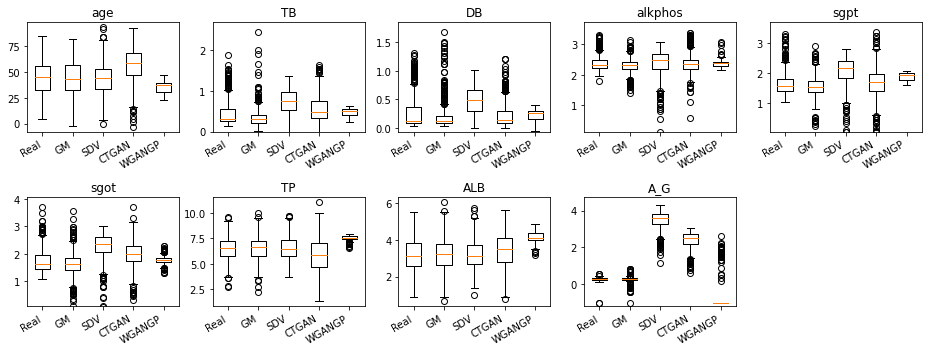

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(13, 5))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[0,3], 4:[0,4], 5:[1,0], 6:[1,1], 7:[1,2], 8:[1,3]}
for i in range(0,len(columns)) :
    if i in [1, 2, 3, 4, 5, 8]:
        mat = np.nan_to_num(np.log10(boxplots_data[columns[i]] + 1), nan=-1)
        mat[mat < - 10] = -1
        
        axs[idx[i][0], idx[i][1]].boxplot(mat)
        axs[idx[i][0], idx[i][1]].set_ylim([1.2*np.nanmin(mat), 1.1*np.nanmax(mat)])
    else:
        axs[idx[i][0], idx[i][1]].boxplot(boxplots_data[columns[i]])
    axs[idx[i][0], idx[i][1]].set_title(columns[i])
    axs[idx[i][0], idx[i][1]].set_xticklabels(DATA_TYPES)
# fig.suptitle('Boxplots Comparison \n Dataset F - Indian Liver Patient', fontsize=18)
for ax in axs.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha="right")
    
fig.delaxes(axs[1,4])
plt.tight_layout()
fig.savefig('UNIVARIATE RESEMBLANCE RESULTS/BOXPLOTS.svg', bbox_inches='tight')

## 6. Frequency distributions comparisson
In this part histograms of each variable are plotted to compare the frequency distributions.

In [20]:
columns = data['Real'].columns
len(columns)

11

In [21]:
hists_data = dict()
for c in columns :
    hists_data[c] = data['Real'][c]
    for name in SYNTHESIZERS :
        hists_data[c] = np.column_stack((hists_data[c], data[name][c]))

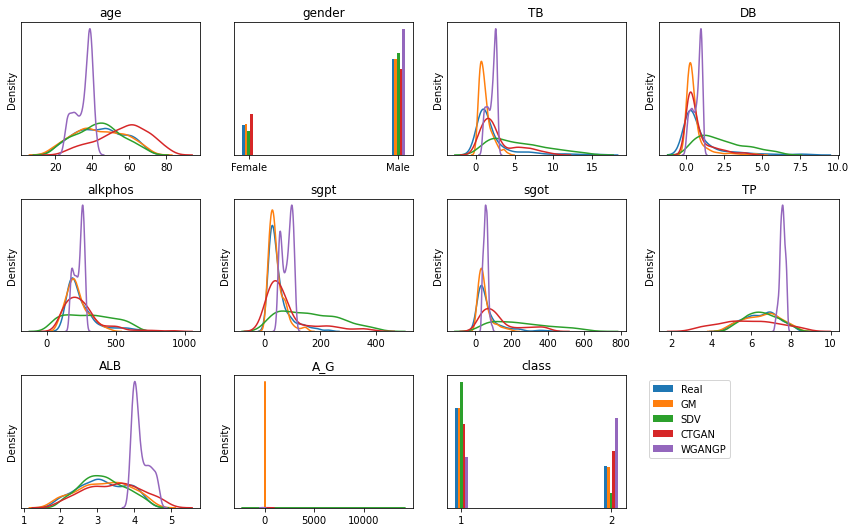

In [22]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12,7.5))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[0,3], 4:[1,0], 5:[1,1], 6:[1,2], 7:[1,3], 8:[2,0], 9:[2,1], 10:[2,2], 11:[2,3]}
for i in range(0,len(columns)):
    ax_i = axs[idx[i][0], idx[i][1]]
    ax_i.set_title(columns[i])
    if i in [0, 2, 3, 4, 5, 6, 7, 8, 9]:
        arr = hists_data[columns[i]]
        for col in range(arr.shape[1]):
            arr_col = np.sort(arr[:, col])
            sns.distplot(arr_col[int(0.05 * len(arr_col)) : int(0.95 * len(arr_col))], hist=False, norm_hist=False, ax=ax_i)
    else:
        if i == 1:
            ax_i.set_xticks([0.05, 0.95])
        elif i == 10:
            ax_i.set_xticks([1.05, 1.95])
            ax_i.set_xticklabels([1, 2])
        ax_i.hist(hists_data[columns[i]], density=False, histtype='bar', label=DATA_TYPES, align='mid')
     
    ax_i.set_yticks([])

plt.tight_layout()
fig.delaxes(axs[2,3])
axs.ravel()[10].legend(bbox_to_anchor=(1.1, 1),bbox_transform=axs.ravel()[10].transAxes)
fig.savefig('UNIVARIATE RESEMBLANCE RESULTS/HISTOGRAMS.svg', bbox_inches='tight')